In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os 
cwd = os.getcwd()
print(cwd)

pd.options.display.max_columns = None
pd.options.display.width=None
pd.options.display.float_format = '{:,.6}'.format

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/content


In [2]:
df=pd.read_csv('HtWt.csv')

df.columns
df.shape
df.dtypes
df.info()
df.head()
df.describe().T

print('NA Counts ================>>>')
df.isna().sum().sum()
df.isna().sum()

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Index(['Height', 'Weight'], dtype='object')

(200, 2)

Height    float64
Weight    float64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  200 non-null    float64
 1   Weight  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


,Height,Weight
0,65.78,112.99
1,71.52,136.49
2,69.4,153.03
3,68.22,142.34
4,67.79,144.3


,count,mean,std,min,25%,50%,75%,max
Height,200.0,67.9498,1.94036,63.43,66.5225,67.935,69.2025,73.9
Weight,200.0,127.222,11.961,97.9,119.895,127.875,136.097,158.96


NA Counts ================>>>


0

Height    0
Weight    0
dtype: int64

Number of duplicate rows = 0


,Height,Weight


Before (200, 2)
After (200, 2)


In [4]:
dff = df[['Height','Weight']]

Q1 = dff.quantile(0.25)
Q3 = dff.quantile(0.75)
IQR = Q3 - Q1

dff.columns
df_items = pd.DataFrame()

df_items['RecCount'] = dff.count()
df_items['Min'] = dff.min()
df_items['Max'] = dff.max()
df_items['Range'] = dff.max() - dff.min()

df_items['Mean'] = dff.mean()
df_items['Median'] = dff.median()
df_items['Q1'] = dff.quantile(0.25)
df_items['Q2'] = dff.quantile(0.50)
df_items['Q3'] = dff.quantile(0.75)
df_items['IQR'] = dff.quantile(0.75) - dff.quantile(0.25)
df_items['Skew'] = dff.skew()
df_items['Kurtosis'] = dff.kurtosis()
df_items['StdDev'] = dff.std()
df_items['Variance'] = dff.var()
df_items['Left3Std'] = df_items['Mean'] - 3 * df_items['StdDev']
df_items['Right3Std'] = df_items['Mean'] + 3 * df_items['StdDev']

df_items['OutlierCount'] = ((dff < (Q1 - 1.5 * IQR)) | (dff > (Q3 + 1.5 * IQR))).sum()

df_items.round(2) 

Index(['Height', 'Weight'], dtype='object')

,RecCount,Min,Max,Range,Mean,Median,Q1,Q2,Q3,IQR,Skew,Kurtosis,StdDev,Variance,Left3Std,Right3Std,OutlierCount
Height,200,63.43,73.9,10.47,67.95,67.94,66.52,67.94,69.2,2.68,0.19,0.02,1.94,3.77,62.13,73.77,2
Weight,200,97.9,158.96,61.06,127.22,127.88,119.9,127.88,136.1,16.2,-0.09,-0.23,11.96,143.06,91.34,163.1,0


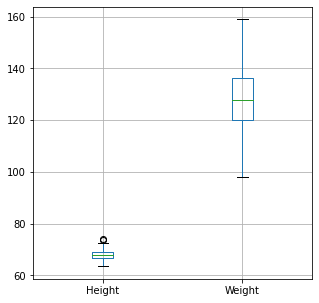

In [10]:
data = df[['Height','Weight']]
data.boxplot(figsize=(5,5))

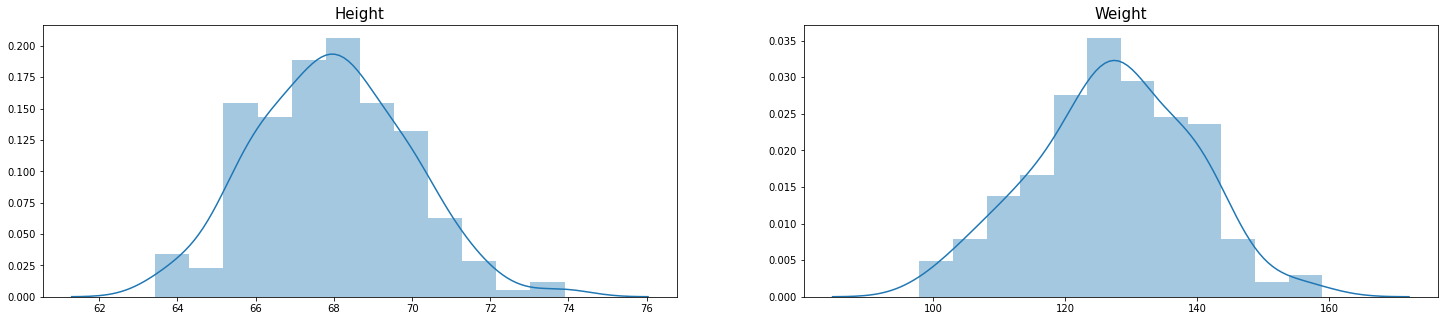

In [12]:
items = ['Height','Weight']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25,5))
i = 0 
for item in items:
    axx=ax[i]
    null = sns.distplot(df[[item]], ax = axx, label=item, hist=True, rug=False).set_title(item, fontsize=15)
    i=i+1